In [26]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


class PixelExtractor:
    def __init__(self, image_path, color = 'g'):
        """Image represents file path to target file """
        self.image_path = image_path
        self.color = color
        
        
    def imageprepare(self, argv):
        """
        This function returns the pixel values as one array with 784 pixel values normalized
        so that 255 is 1 and 0 is 0.
        """
         
        im = Image.open(argv).convert('L')
        img = im.resize((28, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        tv = list(img.getdata()) 
      
        # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
        tva = [(255 - x) * 1.0 / 255.0 for x in tv]
        return tva

    def reshape_pixel_array(self, pixel_arr):
        """ Takes flat array of 784 values and turns it into a 2d array with 28 rows of size 28 """
        reshaped_pixel_arr = []
        n = 28
        while n <= len(pixel_arr):
            reshaped_pixel_arr.append(pixel_arr[n-28:n])
            n+=28

        return reshaped_pixel_arr
    
    def extract_target_pixel_location(self):
        """ Returns list of target pixel locations """
        #Respective Image location
        pixel_array = self.imageprepare(self.image_path)

        #Select less_than_target color point --> must be calibrated
        #?? Should we use an abstract class here instead of an if statment ??
        if self.color == "g":
            less_than_target = .15
        else:
            raise ValueError("Unknown color value")

        #Chooses target pixels as well as it's location
        target_pixels = []
        for pixel in enumerate(pixel_array):
            if pixel[1] < less_than_target:
                target_pixels.append(pixel[0])

        return target_pixels
    
    def draw_image(self):
        """ Draws the image representation of the rgb pixel valued image """
      
        pixel_array = self.imageprepare(self.image_path)
        newArr = self.reshape_pixel_array(pixel_array)
        plt.imshow(newArr, interpolation='nearest')
        plt.savefig('MNIST_IMAGE.png')#save MNIST image
        plt.show()#Show / plot that image

In [27]:
import os
from matplotlib import pyplot as plt


class ImageStitcher:
    def __init__(self, directory_path = 'data'):
        """ Directory Path represents directory containing spliced images """

        self.directory_path = directory_path
        
    def create_composite_image_list (self):
        """ 
        Takes a directory and overlays its content images together based on 
        PixelExtractor's conditions

        """

        directory = os.fsencode(self.directory_path)
        #255 represents a black cell
        #0 represents a white cell
        composite_image_list = [0 for i in range(784)]

        for file in os.listdir(directory):
            filename = os.fsdecode(file)

            #creates pixel_extractor instance
            pixel_extractor = PixelExtractor(self.directory_path + '/' + filename, 'g')
            target_pixel_locations = pixel_extractor.extract_target_pixel_location()
            for loc in target_pixel_locations:
                composite_image_list[loc] = 255

        return composite_image_list
    
    def draw_image(self):
        """Draws the image representation of the composite image"""

        composite_image_list = self.create_composite_image_list()

        reshaped_composite_image = self.reshape_pixel_array(composite_image_list)

        plt.imshow(reshaped_composite_image, cmap='Greys',  interpolation='nearest')
        # plt.savefig('MNIST_IMAGE.png')#save MNIST image
        plt.show()#Show / plot that image
        return composite_image_list
    
    def reshape_pixel_array(self, composite_image_list):
        """ Takes flat array of 784 values and turns it into a 2d array with 28 rows of size 28 """
        reshaped_composite_image = []
        n = 28
        while n <= len(composite_image_list):
            reshaped_composite_image.append(composite_image_list[n-28:n])
            n+=28

        return reshaped_composite_image


In [28]:
import cv2
import os
import shutil


class VideoToImageConverter:
    """
    This class is responsible for converting a video to frames and saving it
    to a specified directory.
    """

    def __init__(self, video_path):
        self.video_path = video_path

    def splice_video(self, destination_path = 'data'):
        """ 
        Splices given video to individual images and 
        writes them to a folder specified by destination_path

        *Don't name your destination path a folder that is important,
        since this folder will be deleted and populated with images
        """

        # Playing video from file:
        vidcap = cv2.VideoCapture(self.video_path)

        #Saves to respective folder
        try:
            if os.path.exists(destination_path):
                #Deletes any folder currently named ./data if it exists
                shutil.rmtree(destination_path, ignore_errors=True)
                print("Deleting current '" + destination_path + "' folder" )


            print("Creating new '" + destination_path + "' folder" )
            os.makedirs(destination_path)

        except OSError:
            print ('Error: Cannot create directory')

        frame_count = 0

        while(True):
            # Capture frame-by-frame

            hasFrames,image = vidcap.read()

            if hasFrames:

                # Saves image of the current frame in jpg file
                name = './'+ destination_path +'/frame' + str(frame_count) + '.jpg'
                print ('Spliced ' + name)
                cv2.imwrite(name, image)
                frame_count += 1

            else:
                break

        # When everything done, release the capture
        vidcap.release()
        cv2.destroyAllWindows()

In [34]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib


#only run this if you want to generate the model

data = pd.read_csv("/Users/zumaad/Laser_Translation/final/train.csv")
print("made data")
print("")
features  = data.drop("label", axis = 1)
target = data["label"]
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
print("made training and test data")
print("")

knn = KNeighborsClassifier(n_neighbors = 6)

k1 = KNeighborsClassifier(n_neighbors = 4)

model = DecisionTreeClassifier(max_depth = 10)

gnb = GaussianNB()

print("made models")
print("")

knn.fit(X=X_train, y=y_train)
filename = 'Downloads/knn_model.sav'
joblib.dump(knn, filename)
print("fit KNeighborsClassifier")
print("")
print("saved the trained knn model")
print("")

#k1.fit(X=X_train, y=y_train)

model.fit(X=X_train, y=y_train)
print("fit DecisionTreeClassifier")
print("")

gnb.fit(X=X_train, y=y_train)
print("fit GaussianNB")
print("")

print("calculating accuracies:")
print("")

print("Prediction accuracy on the training data with KNeighborsClassifier :", format(knn.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with KNeighborsClassifier :", format(knn.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with DecisionTreeClassifier :", format(model.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with DecisionTreeClassifier :", format(model.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with GaussianNB :", format(gnb.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with GaussianNB :", format(gnb.score(X_test, y_test)*100, ".2f"))
print("")

# print("Prediction accuracy on the training data with k1 :", format(k1.score(X_train, y_train)*100, ".2f"))
# print("Prediction accuracy on the test data with k1 :", format(k1.score(X_test, y_test)*100, ".2f"))
# print("")

print("testing the model with singular data")
print("")
loaded_model = joblib.load("/Users/zumaad/Laser_Translation/final/k1_model.sav")
indexes start from 14322 and has 10,500 numbers for test data. 
indexes for eg are: 14322, 22264, 32118 etc.
use same number for index in x_test  and y_test: y_test  are the  answers  for x_test.


d = X_test.loc[[21284]]

print(y_test[21284])
print("")

model expects a data frame, the syntax above (passing a list to loc), returns a DF instead of a series representing a row
print(loaded_model.predict(X_test.loc[[21284]])[0])
print("")

if(y_test[21284] == loaded_model.predict(X_test.loc[[21284]])[0]):
    print("test passed")
else:
    print("test failed")

In [29]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd

In [30]:
#load the model from the file with all the model properties
loaded_model = joblib.load("/Users/zumaad/Laser_Translation/final/k1_model.sav")

In [31]:
#convert video to frames to be analyzed to create the composite image
vti_converter = VideoToImageConverter('5.mp4')
vti_converter.splice_video('data')

Deleting current 'data' folder
Creating new 'data' folder
Spliced ./data/frame0.jpg
Spliced ./data/frame1.jpg
Spliced ./data/frame2.jpg
Spliced ./data/frame3.jpg
Spliced ./data/frame4.jpg
Spliced ./data/frame5.jpg
Spliced ./data/frame6.jpg
Spliced ./data/frame7.jpg
Spliced ./data/frame8.jpg
Spliced ./data/frame9.jpg
Spliced ./data/frame10.jpg
Spliced ./data/frame11.jpg
Spliced ./data/frame12.jpg
Spliced ./data/frame13.jpg
Spliced ./data/frame14.jpg
Spliced ./data/frame15.jpg
Spliced ./data/frame16.jpg
Spliced ./data/frame17.jpg
Spliced ./data/frame18.jpg
Spliced ./data/frame19.jpg
Spliced ./data/frame20.jpg
Spliced ./data/frame21.jpg
Spliced ./data/frame22.jpg
Spliced ./data/frame23.jpg
Spliced ./data/frame24.jpg
Spliced ./data/frame25.jpg
Spliced ./data/frame26.jpg
Spliced ./data/frame27.jpg
Spliced ./data/frame28.jpg
Spliced ./data/frame29.jpg
Spliced ./data/frame30.jpg
Spliced ./data/frame31.jpg
Spliced ./data/frame32.jpg
Spliced ./data/frame33.jpg
Spliced ./data/frame34.jpg
Spliced

In [32]:
#create object which is used to stitch individual frames into the composite image
image_stitcher = ImageStitcher()

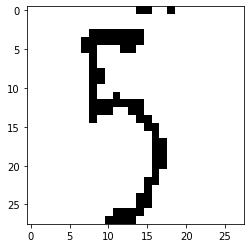

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])